In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/TCC/train.csv', header =None)
df_test = pd.read_csv('/content/drive/MyDrive/TCC/test.csv', header =None)

In [4]:
df = df.sample(20_000)
df = df.reset_index(drop=True)
df_test = df_test.sample(4_000)
df_test = df_test.reset_index(drop=True)

In [5]:
df[3] = df[1] + ' ' + df[2]
df.head()

,0,1,2,3
0,2,Nice Texture,Dr. Kracker has developed a new production tec...,Nice Texture Dr. Kracker has developed a new p...
1,1,This song is so bad Limp Bizkit should sing it.,This is easily the worst song I've ever heard....,This song is so bad Limp Bizkit should sing it...
2,1,Some books are for collection only,"Chen is a great master, but this book is not w...",Some books are for collection only Chen is a g...
3,2,really nice earrings,These are beautiful earrings. I am not disappo...,really nice earrings These are beautiful earri...
4,1,A true embarrassment,"In literary studies, characters are often refe...","A true embarrassment In literary studies, char..."


In [6]:
df.columns = ['Sentiment', 'Title', 'Review', 'Input']

In [7]:
df = df.drop(labels="Title", axis=1)
df = df.drop(labels="Review", axis=1)
df.head()

,Sentiment,Input
0,2,Nice Texture Dr. Kracker has developed a new p...
1,1,This song is so bad Limp Bizkit should sing it...
2,1,Some books are for collection only Chen is a g...
3,2,really nice earrings These are beautiful earri...
4,1,"A true embarrassment In literary studies, char..."


In [8]:
df_test[3] = df_test[1] + ' ' + df_test[2]
df_test.columns = ['Sentiment', 'Title', 'Review', 'Input']
df_test = df_test.drop(labels="Title", axis=1)
df_test = df_test.drop(labels="Review", axis=1)
df_test.head()

,Sentiment,Input
0,1,"STAY AWAY FROM THIS PRODUCT Well, this is my s..."
1,1,Bad video footage I bought this dvd because I ...
2,2,"Spa Chemicals- Alkalinity Increaser, 2-Pound I..."
3,1,This looks like it OUGHT to be fun! This toy l...
4,1,"Not a reference, and not an introductory text ..."


In [9]:
print(df.shape, df_test.shape)

(20000, 2) (4000, 2)


In [10]:
df['Input'] = df['Input'].astype(str)
df['Length'] = df['Input'].apply(lambda x: len(x))

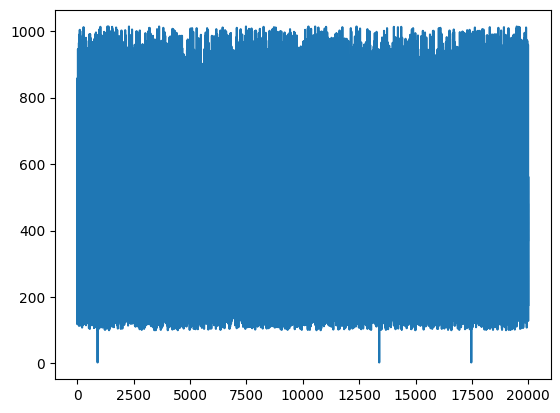

In [11]:
plt.plot(df.Length)
plt.show()

In [12]:
df.Length.max() # max length of the text body 

1014

In [13]:
df['Sentiment'].value_counts()

2    10016
1     9984
Name: Sentiment, dtype: int64

In [14]:
df_test['Sentiment'].value_counts()

2    2026
1    1974
Name: Sentiment, dtype: int64

In [15]:
!pip install text_hammer
import text_hammer as th

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.18 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


In [16]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 454 µs, sys: 23 µs, total: 477 µs
Wall time: 463 µs


In [17]:
df_cleaned_train = text_preprocessing(df, 'Input')

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [18]:
df_cleaned_train.head()

,Sentiment,Input,Length
0,2,nice texture dr kracker have develop a new pro...,234
1,1,this song is so bad limp bizkit should sing it...,474
2,1,some book are for collection only chen is a gr...,230
3,2,really nice earring these are beautiful earrin...,157
4,1,a true embarrassment in literary study charact...,856


In [19]:
from wordcloud import WordCloud

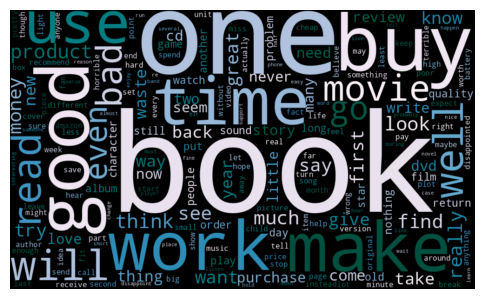

<Figure size 640x480 with 0 Axes>

In [20]:
text = " ".join(df_cleaned_train[df_cleaned_train['Sentiment']==1].Input)
negative_word_cloud = WordCloud(collocations = False,
                       colormap = 'PuBuGn_r', 
                       width = 1000, 
                       height = 600,
                       background_color = 'black').generate(text)

plt.figure(figsize = (6, 6))
plt.imshow(negative_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('word_cloud_negative.png')

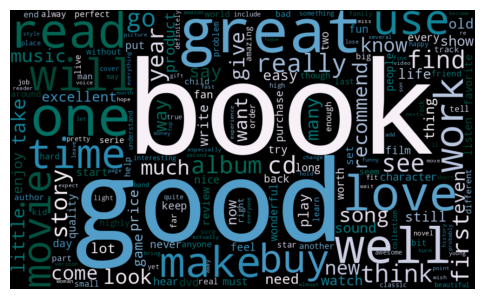

<Figure size 640x480 with 0 Axes>

In [21]:
text = " ".join(df_cleaned_train[df_cleaned_train['Sentiment']==2].Input)
positive_word_cloud = WordCloud(collocations = False,
                       colormap = 'PuBuGn_r', 
                       width = 1000, 
                       height = 600,
                       background_color = 'black').generate(text)

plt.figure(figsize = (6, 6))
plt.imshow(positive_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('word_cloud_positive.png')

In [22]:
from keras.preprocessing.text import Tokenizer

In [23]:
num_words = 20000 
tokenizer = Tokenizer(num_words,lower=True)
df_total = pd.concat([df_cleaned_train['Input'], df_test.Input], axis = 0)
tokenizer.fit_on_texts(df_total)

In [24]:
len(tokenizer.word_index)

67795

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
X_train=tokenizer.texts_to_sequences(df_cleaned_train['Input'])
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post')
X_test = tokenizer.texts_to_sequences(df_test.Input)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')

In [27]:
from keras.utils import to_categorical

In [28]:
y_train = to_categorical(df_cleaned_train.Sentiment.values)
y_test = to_categorical(df_test.Sentiment.values)

In [29]:
print(X_train_pad.shape)

(20000, 300)


In [30]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [31]:
glove_gensim['cat'].shape[0]

100

In [32]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words, vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

In [33]:
gensim_weight_matrix.shape

(20000, 100)

In [34]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [35]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 0)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [37]:
history = model.fit(X_train_pad,y_train, epochs = 20, batch_size = 128, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc])

Epoch 1/20
157/157 [==============================] - ETA: 0s - loss: 0.5233 - accuracy: 0.7336
Epoch 1: val_accuracy improved from -inf to 0.82800, saving model to ./model.h5
157/157 [==============================] - 243s 1s/step - loss: 0.5233 - accuracy: 0.7336 - val_loss: 0.3873 - val_accuracy: 0.8280
Epoch 2/20
157/157 [==============================] - ETA: 0s - loss: 0.4193 - accuracy: 0.8106
Epoch 2: val_accuracy improved from 0.82800 to 0.83550, saving model to ./model.h5
157/157 [==============================] - 230s 1s/step - loss: 0.4193 - accuracy: 0.8106 - val_loss: 0.3807 - val_accuracy: 0.8355
Epoch 3/20
157/157 [==============================] - ETA: 0s - loss: 0.3843 - accuracy: 0.8283
Epoch 3: val_accuracy improved from 0.83550 to 0.85850, saving model to ./model.h5
157/157 [==============================] - 232s 1s/step - loss: 0.3843 - accuracy: 0.8283 - val_loss: 0.3467 - val_accuracy: 0.8585
Epoch 4/20
157/157 [==============================] - ETA: 0s - loss: 

In [38]:
loss, accuracy, = model.evaluate(X_test_pad, y_test, verbose=0)

print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Loss    : {:.4f}'.format(loss))


Accuracy  : 0.8668
Loss    : 0.3241


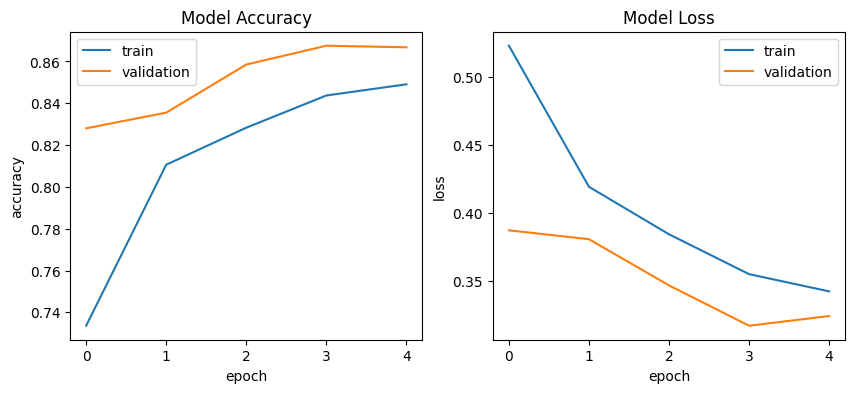

In [39]:
def plot_training_hist(history):
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

125/125 [==============================] - 31s 230ms/step


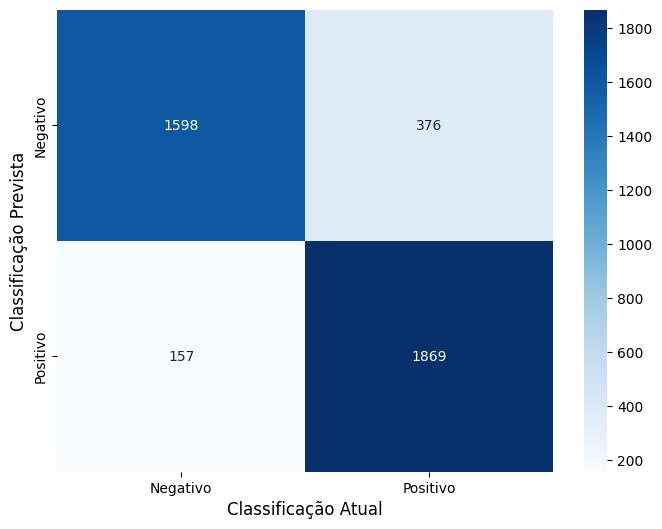

In [40]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    
    sentiment_classes = ['Negativo','Positivo']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.xlabel('Classificação Atual', fontsize=12)
    plt.ylabel('Classificação Prevista', fontsize=12)
    
plot_confusion_matrix(model, X_test_pad, y_test)

In [41]:
df_test.head(4000)

,Sentiment,Input
0,1,"STAY AWAY FROM THIS PRODUCT Well, this is my s..."
1,1,Bad video footage I bought this dvd because I ...
2,2,"Spa Chemicals- Alkalinity Increaser, 2-Pound I..."
3,1,This looks like it OUGHT to be fun! This toy l...
4,1,"Not a reference, and not an introductory text ..."
...,...,...
3995,2,"Excellent sealed cans I'll be honest here, the..."
3996,2,Delicious and always fresh My husband has diab...
3997,2,Another solid Sum 41 Album. While this album i...
3998,2,"Research Papers for Dummies Great, this is ver..."


In [46]:
predictions = model.predict(X_test_pad)
predicted_labels = np.where(np.greater(predictions, 0.5), 1, 0)

for i in range(400):
    print('Sentence:', df_test.iloc[i]['Input'])
    print('Network decision:', predicted_labels[i])
    print()

125/125 [==============================] - 29s 232ms/step
Sentence: STAY AWAY FROM THIS PRODUCT Well, this is my second disappointment with a DLO product. First I had the IBOOM disappointment, now this. I agree with each comment on this blog. It is a waste of money for this product. The remote does not work. Do not try to use a Gen 5 IPOD, it will not work. My point is: Stay away from DLO products. Lesson learned? Yes, from now on I will check any product that I intend to buy at any store before I order it. The best thing I found to stream your music and your videos is the IOMEGA media player. It is basically a hard drive that can play any video format and all your music on any audio component or your TV.
Network decision: [0 1 0]

Sentence: Bad video footage I bought this dvd because I had Trial by fire but lost it.This dvd has trial by fire but all the songs I like are missing like far beond the sun and black star.They are on live in Japan which is included but the way it was filmed 